<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px; padding:17px ">TP: Arbres de décisions</p>


# Objectifs du TP :

**Prédictions des diabètes
Nous allons voir un exemple de mise en œuvre d'un classificateur 'arbre de décision' pour le problème du
diabète. L'objectif est de prédire sur la base de mesures diagnostiques si un patient est atteint de diabète ou
non.
Nous construisons un modèle qui va faire des prédictions, nous devons donc trouver un moyen d'évaluer la
qualité de ces prédictions. Étant donné que les prédictions par définition ne concernent que des données
inédites, nous ne pouvons pas dépendre des données utilisées pour évaluer le modèle. Nous avons pour cela
diviser le jeu de données en deux parties non croisées.**

**Les Questions:**

1. Importer les bibliothèques nécessaires pour l’algorithme Decision Tree (from sklearn import tree)
utiliser (tree.DecisionTreeClassifier())

2. Nous utilisons l'ensemble d'entrainement pour construire notre modèle pour les arbres de decision.

3. Évaluer son score sur l'ensemble de test.

4. Visualiser l’arbres de décision.



In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Charger le jeu de données à partir du fichier CSV
dataset = pd.read_csv("diabetes.csv")

# Afficher les premières lignes du jeu de données.
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Séparer les fonctionnalités (features) et la variable cible (target)
X = dataset.drop('Outcome', axis=1)  # Fonctionnalités
y = dataset['Outcome']  # Variable cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

- Utiliser l'ensemble d'entraînement pour construire le modèle pour les arbres de décision :

In [4]:
# Initialisation du classificateur d'arbre de décision
classifier = DecisionTreeClassifier()
# Entraînement du modèle sur l'ensemble d'entraînement
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

- Évaluer son score sur l'ensemble de test :

In [5]:
# Évaluation du score sur l'ensemble de test
score = classifier.score(X_test, y_test)
print("Score sur l'ensemble de test :", score)


Score sur l'ensemble de test : 0.6927083333333334


- visualisation:

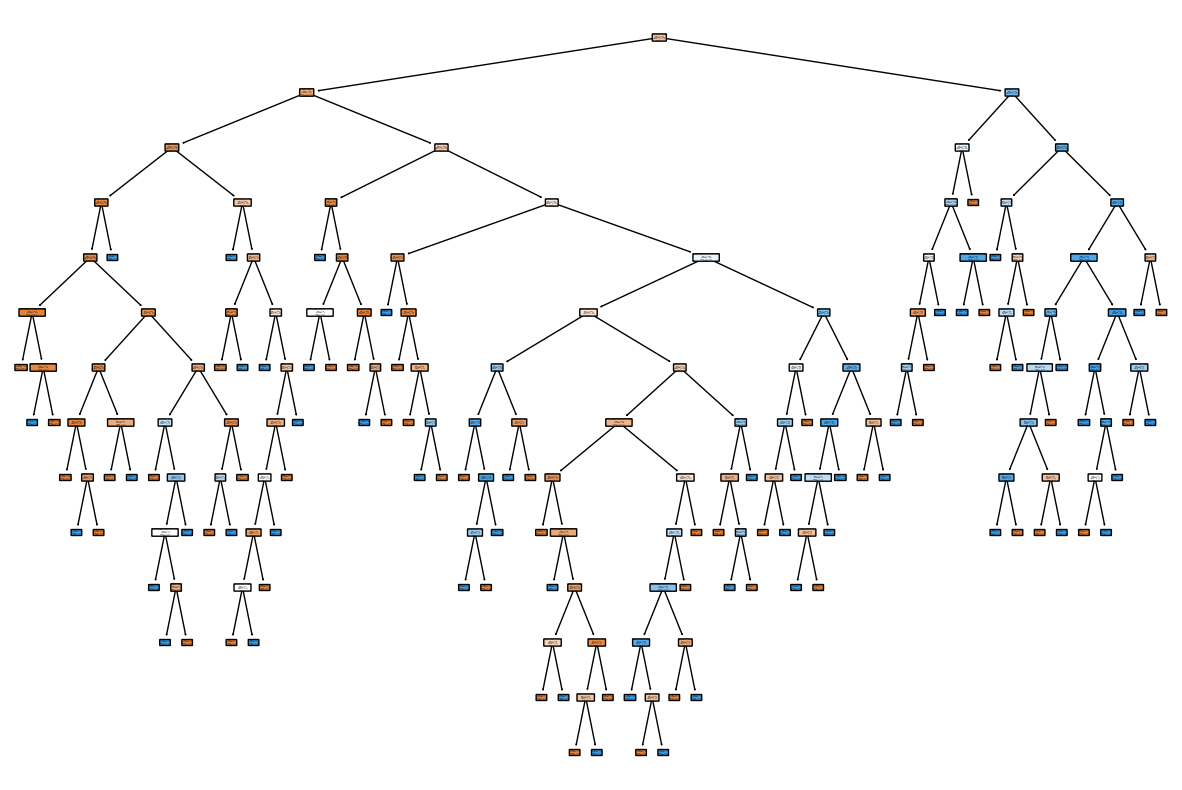

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Tracer l'arbre de décision
plt.figure(figsize=(15, 10))  # Réglage de la taille de la figure
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=["0", "1"], rounded=True)
plt.show()


- Visualisation plus claire

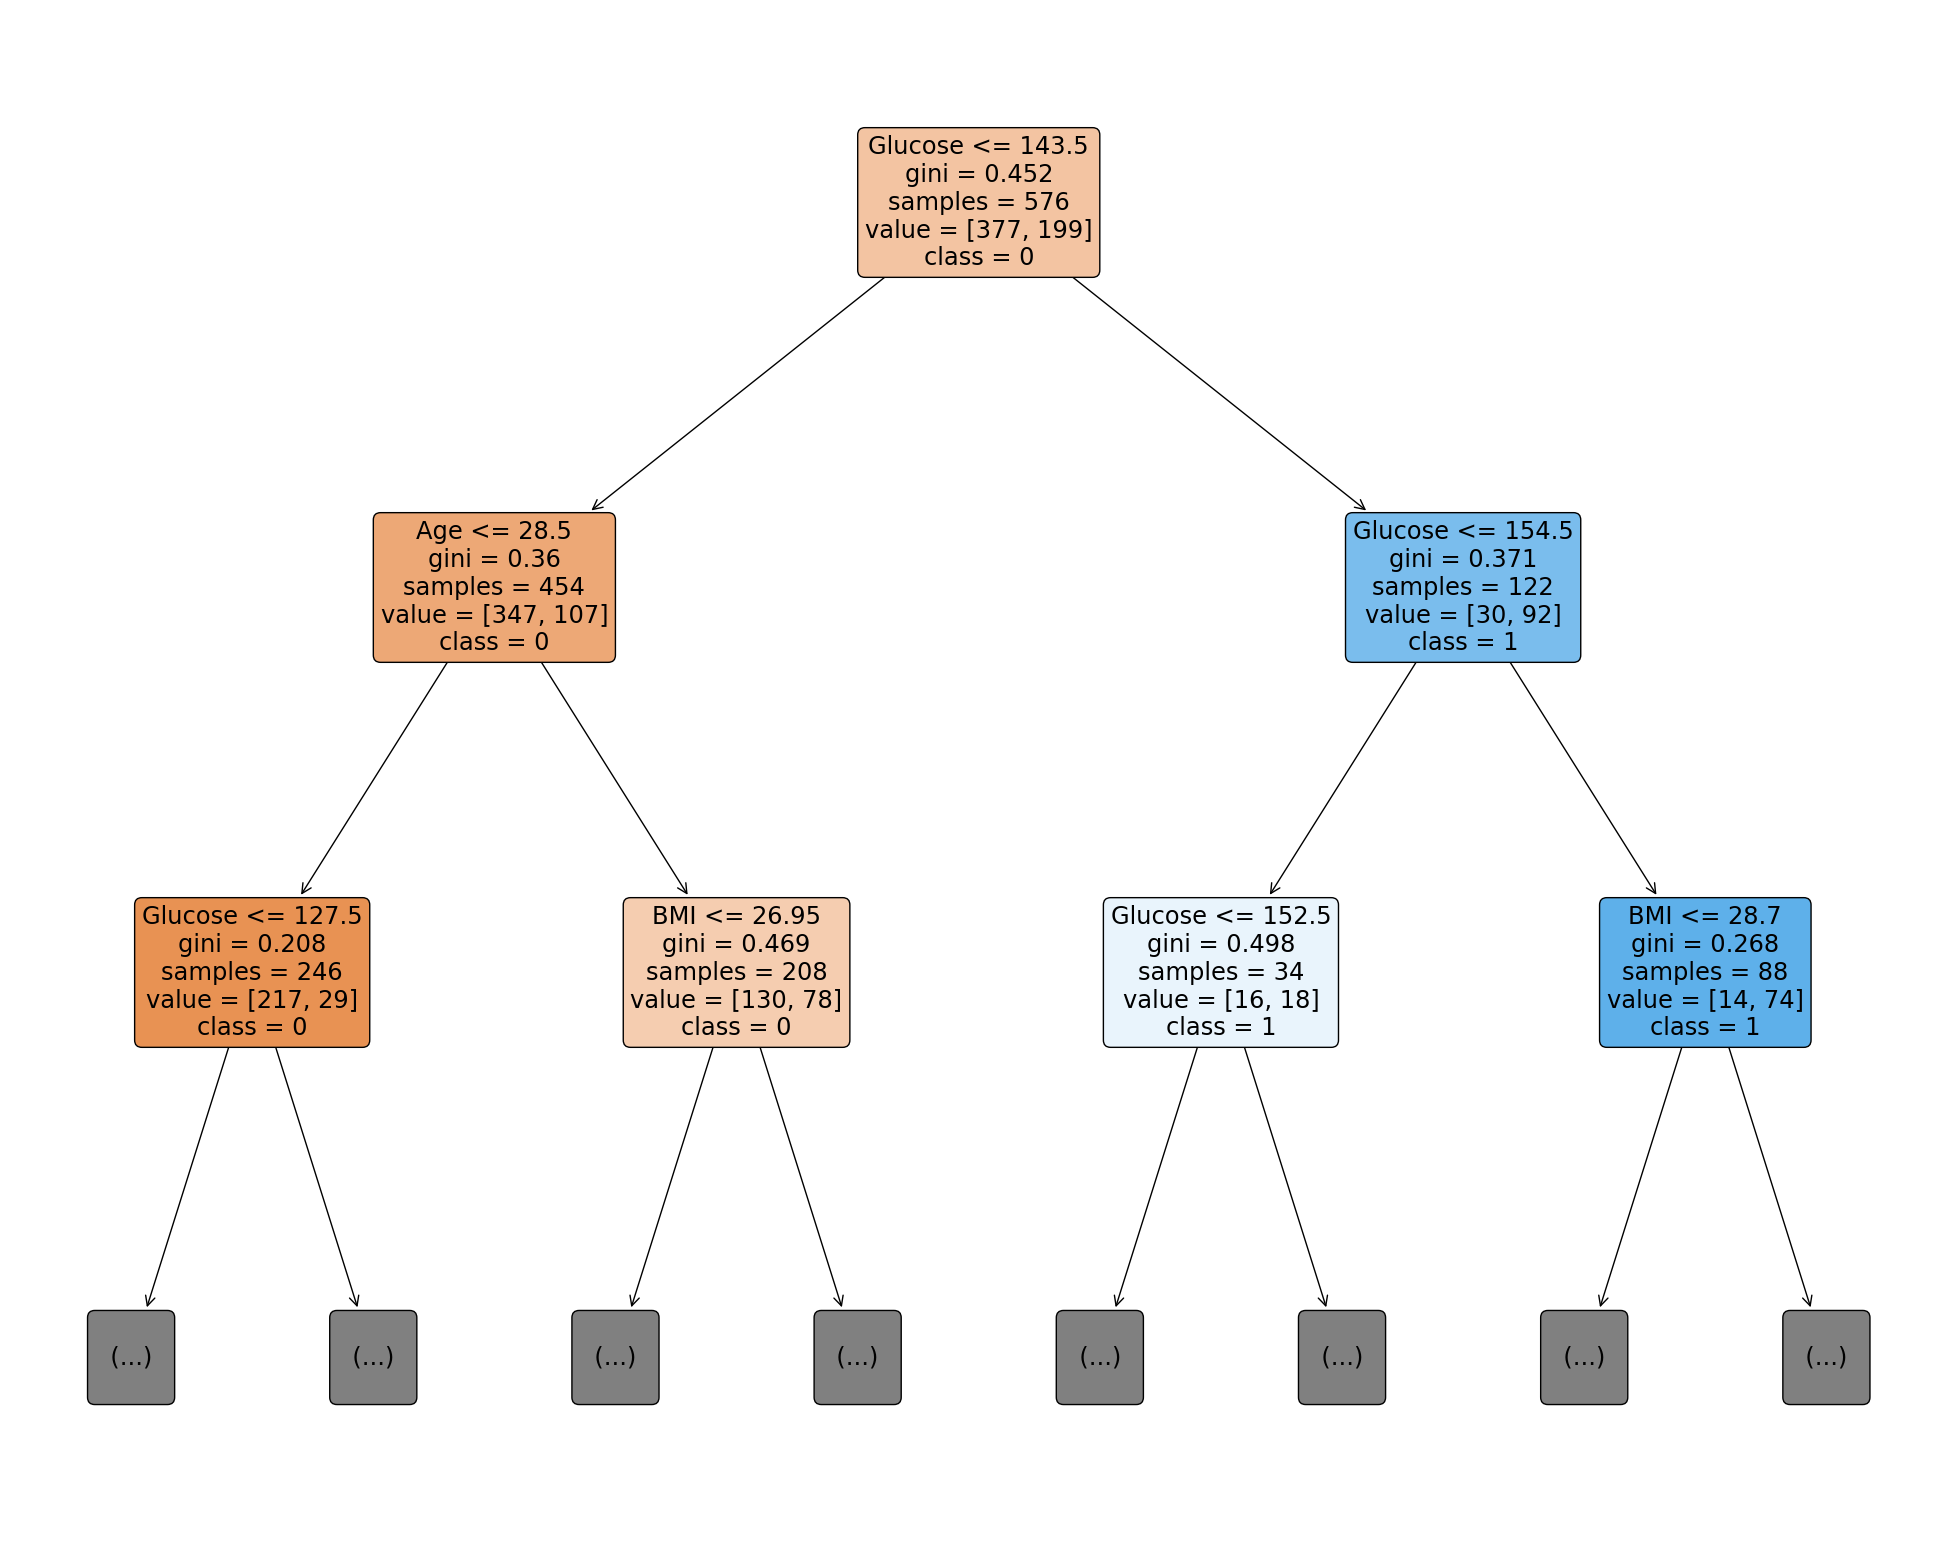

In [7]:
# Tracer l'arbre de décision avec une taille de figure plus grande
plt.figure(figsize=(25, 20))

max_depth = 2 
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=["0", "1"], rounded=True, max_depth=max_depth)

plt.show()

### Evaluation de model

- matrice de confusion

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[87, 36],
       [23, 46]], dtype=int64)

- Arbre de decision VS logistic regression:

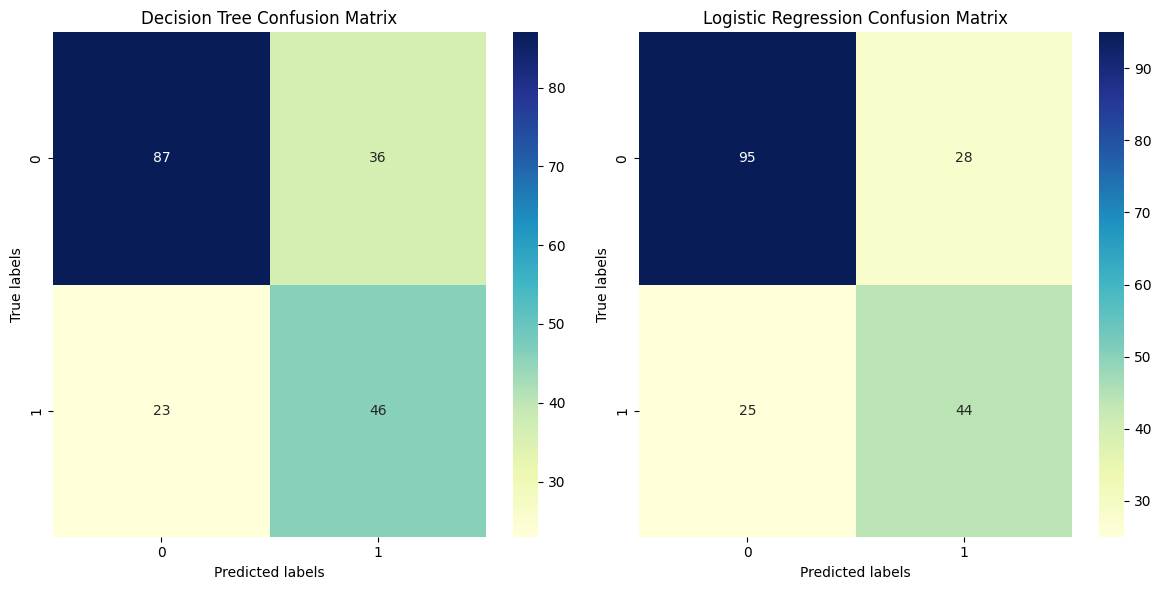


Decision Tree Classifier Metrics:
Accuracy: 0.6927083333333334
Precision: 0.708276746119734
Recall: 0.6927083333333334
F1 Score: 0.6973636060028992

Logistic Regression Classifier Metrics:
Accuracy: 0.7239583333333334
Precision: 0.726779513888889
Recall: 0.7239583333333334
F1 Score: 0.7251909859031608


In [9]:
from sklearn.linear_model import LogisticRegression

# Decision Tree Classifier evaluation
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
f1_dt = f1_score(y_test, y_pred, average='weighted')

# Logistic Regression Classifier evaluation
# model:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
# metrics:
y_pred_logreg = logreg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
precision_lr = precision_score(y_test, y_pred_logreg, average='weighted')
recall_lr = recall_score(y_test, y_pred_logreg, average='weighted')
f1_lr = f1_score(y_test, y_pred_logreg, average='weighted')

# Confusion Matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.tight_layout()
plt.show()

# Print Evaluation Metrics
print("\nDecision Tree Classifier Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

print("\nLogistic Regression Classifier Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)


L'algorithme des arbres de décision est moin performant par apport a l'algorithme de la regression logistic.

## Fin.